# Analise de Complexidade de Algoritmos

## Motivação

Vamos continuar nossa análise de algoritmos.

Na aula anterior estudamos as principais ordens de crescimento e notações para analisar algoritmos. No entanto, focamos em algoritmos mais simples.

Nessa aula vamos focar em algoritmos com complexidade logaritmica e, em seguida, vamos estudar um pouco de recursão.

## Objetivos

Ao final dessa aula o aluno deverá conhecer:

- Como estudar um algoritmo de complexidade logaritmica
- O que é e como estudar algoritmos recursivos

## Relembrando

##### Notações

As seguintes notações são utilizadas para comparar as diferentes ordens de crescimento.

- Big O

O(f(n)) é o conjunto de todas as funções com menor ou igual ordem de crescimento do que f(n). Limitante superior.

<div>
    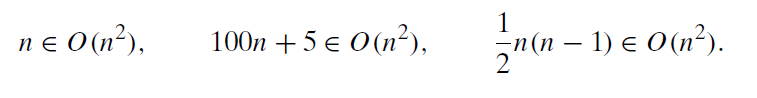
</div>

<div>
    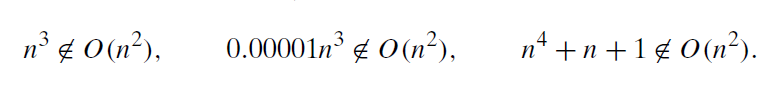
</div>

<div>
    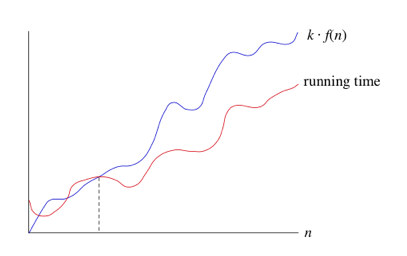
</div>

Dizemos que a ordem de crescimento da função que define o tempo de execução nunca será maior do que o limitante superior f(n).

- Big Omega

Ω(f(n)) é o conjunto de todas as funções com maior ou igual ordem de crescimento do que f(n). Limitante inferior.

<div>
    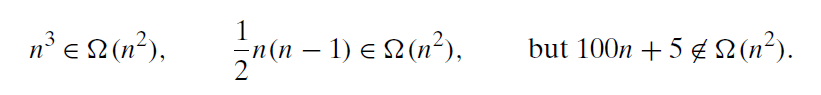
</div>

<div>
    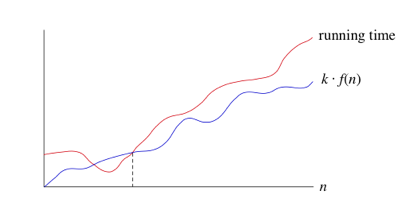
</div>

Dizemos que a ordem de crescimento da função que define o tempo de execução nunca será menor do que o limitante inferior f(n).

- Big Theta

Limitante superior e inferior. θ(f(n)) são funções com a mesma ordem de crescimento que f(n).

<div>
    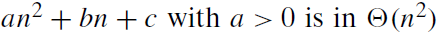
</div>

<div>
    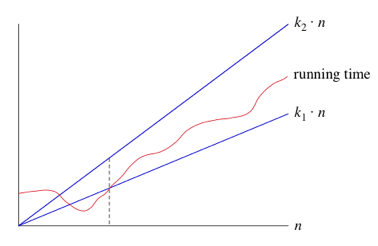
</div>

Dizemos que a ordem de crescimento da função que define o tempo de execução está limitada acima e abaixo por f(n) multiplicado por alguma constante k2 (acima) e k1 (abaixo).

A notação mais utilizada é o Big O, pois podemos classificar os algoritmos com apenas um limitante superior. Ou seja, a complexidade de um algoritmo nunca será pior do que a função em questão.

<b>Usando limites para comparar as funções</b>

<div>
    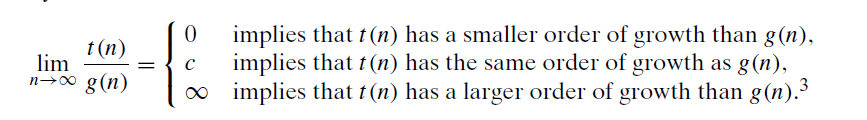
</div>

Caso 1 e Caso 2: t(n) pertence ao O(g(n))
Caso 2 e Caso 3: t(n) pertence ao Ω(g(n))
Caso 2         : t(n) pertence ao θ(g(n))

Vamos analisar as seguintes funções:

1. t(n) = n e g(n) = n^2

2. t(n) = (1/2)n(n - 1) e g(n) = n^2

<b>Uma analogia para simplificar</b>

Big O é similar ao relacionamento "menor ou igual". Se Bob tem X anos, assumindo que ninguém vive mais do que 130 anos, podemos dizer que X <= 130. Também seria correto dizer X <= 1000 ou X <= 1000000. Isso é tecnicamente correto, mas pouco acurado. Da mesma forma, um algoritmo que imprime elementos na tela é O(N), mas também O(N^2) ou qualquer BigO maior do que isso. A ideia é encontrar a função mais próxima da realidade possível.

<b>Classes de eficência</b>

Na maioria das vezes a eficiência de tempo dos algoritmos cai em somente algumas classes.

<div>
    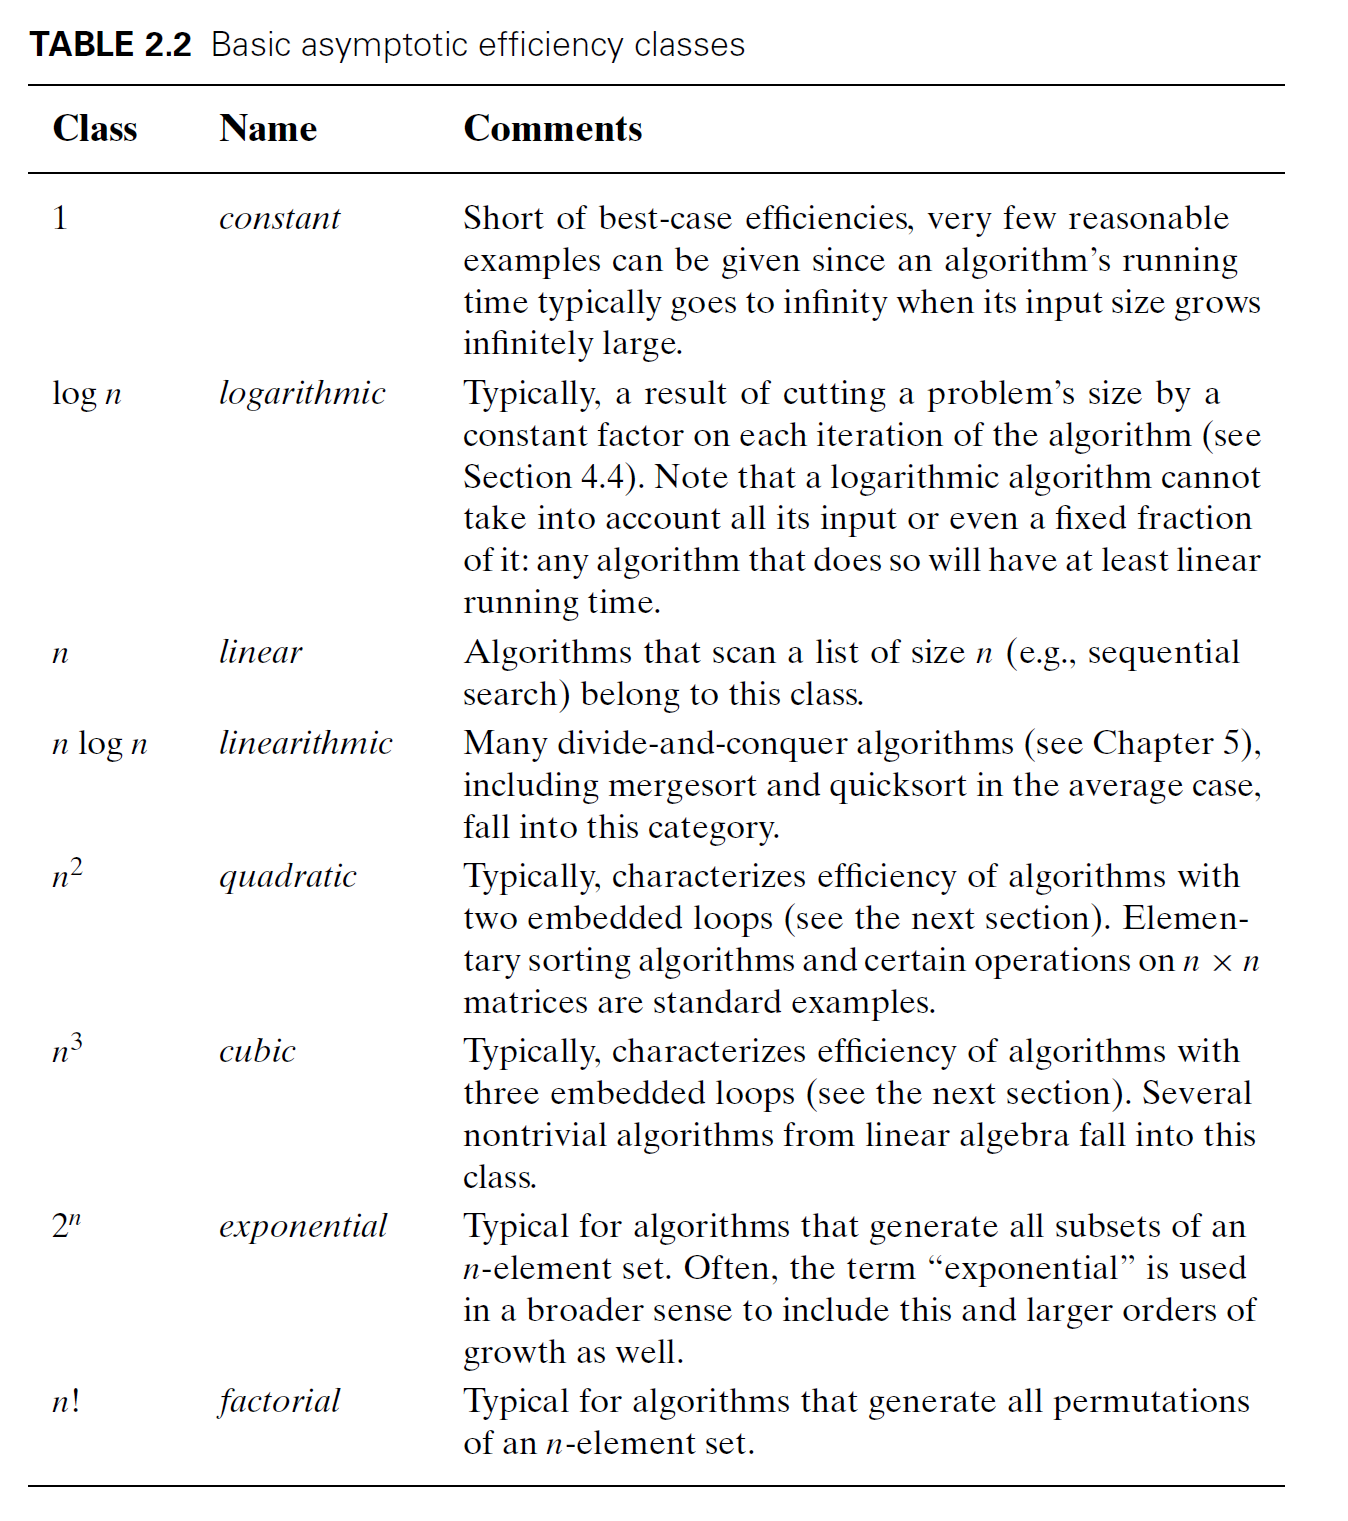
</div>

## Tempo de execução logaritmica

Considere o algoritmo de busca binária. 

Em resumo, ele parte de uma lista ordenada, olhando sempre para o elemento do meio, descartando metade da lista a cada iteração.

In [2]:
import math

def binary_search(arr, low, high, x):
    if high < low:
        return -1

    mid = math.trunc((high + low) / 2)
    
    print(f'{low} {high}')
    
    print(f'Find {x} in {arr[low:high + 1]} -> Number of elements {high - low + 1} -> Mid {arr[mid]}')
    
    # x is in the middle
    if arr[mid] == x:
        return mid

    # x is smaller than mid, then go to the left subarray
    elif arr[mid] > x:
        return binary_search(arr, low, mid - 1, x)

    # else go to the right subarray
    else:
        return binary_search(arr, mid + 1, high, x)

arr = [16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]
arr.sort()
binary_search(arr, 0, len(arr) - 1, 9)

0 15
Find 9 in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16] -> Number of elements 16 -> Mid 8
8 15
Find 9 in [9, 10, 11, 12, 13, 14, 15, 16] -> Number of elements 8 -> Mid 12
8 10
Find 9 in [9, 10, 11] -> Number of elements 3 -> Mid 10
8 8
Find 9 in [9] -> Number of elements 1 -> Mid 9


8

A cada iteração do algoritmo acima, eliminamos metade dos dados. Portanto, o tempo de execução desse algoritmo é quantas vezes podemos dividir N por 2 até chegarmos a 1 elemento.

N = 16
N = 8  // divide por 2
N = 4  // divide por 2
N = 2  // divide por 2
N = 1  // divide por 2

Nesse caso, foram necessários 4 passos. Se pensarmos de forma contrária, partindo de 1, quantas vezes podemos multiplicar 1 por 2 até chegarmos em N = 16?

    16      = 2 * 2 * .. = 2^4 (aplica-se o log base 2 nos dois lados)
    log(16) = log(2^4) = 4     (propriedades do log)
    
    Em termos gerais:
    
    logN = k -> 2^k = N, ou seja, o número de iterações necessárias para esse algoritmo é uma função logaritmica.

Em geral, algoritmos que podam o espaço de busca pela metade possuem complexidade logaritmica.

## Algoritmos recursivos

### O que é recursão?

Em matemática e computação, o conceito de recursão se dá quando um problema pode ser definido parcialmente em termos dele mesmo.

A idéia básica de um algoritmo recursivo consiste em diminuir sucessivamente o problema em um problema menor ou mais simples, até que o tamanho ou a simplicidade do problema reduzido permita resolvê-lo de forma direta, sem recorrer a si mesmo.

    Exemplos: cálculo do fatorial de um número, sequência de Fibonacci, torre de Hanoi, etc.
    
- Fatorial

Fat(n) = n! = n * (n - 1) * (n - 2) * .. 1, n >= 1, 0! = 1

Fat(5) = 5 * 4 * 3 * 2 * 1 = 120

Perceba que para calulcar o fatorial de n, precisamos do fatorial de todos os seus antecedentes: n - 1, n - 2, etc. 

Portanto, esse cálculo é recursivo:

    Fat(n) = n * Fat(n - 1), n > 0
    Fat(0) = 1
    Fat(1) = 1
    
Vamos escrever o algoritmo do fatorial?

In [5]:
def fat(n):
    if (n < 1):
        return 1
    return n * fat(n - 1)

fat(5)

120

### Análise de complexidade de algoritmos recursivos

Qual a entrada do algoritmo? Qual a operação básica do algoritmo do fatorial?

    Operação básica: M(n)

Quantas vezes temos que executar essa operação para calcular o fatorial de n? Ou seja, qual o valor de M(n)?

    M(n) = M(n - 1) + 1

    M(n - 1) => Refere-se ao numero de operações para calcular Fat(n - 1)
    1        => Refere-se a uma multiplicação Fat(n - 1) * n

Perceba que estamos tentando descobrir o número de vezes que a operação básica é executada pelo algoritmo em função de sua entrada, n.

Entretanto, diferente dos outros algoritmos, nesse caso também dependemos de execuções passadas, M(n - 1). Esse tipo de equação é chamada de <i>relação de recorrência</i>.

Para resolver essa recorrência, precisamos de uma condição inicial (condição de parada).

Lembrando que:

    se n < 1, retorna 1

Quando n < 1, nosso algoritmo não executa nenhuma operação, apenas retorna. Portanto, a relação de recorrência para calcular o número de multiplicações executadas pelo fatorial é:

    M(0) = M(1) = 0
    M(n) = M(n - 1) + 1

Vamos utilizar o método de substituição para resolver essa recorrência:

<div>
    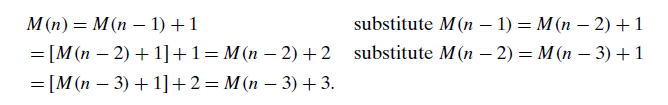
</div>

Após algumas substituições, percebemos o padrão:

    M(n) = M(n - i) + i
    
Portanto, sabendo que M(0) = 0, temos:

    M(n) = M(n - 1) + 1 = ... = M(n - i) + i = ... = M(n - n) + n = n

Logo, a complexidade do algoritmo Fat(n) é O(n).

### Exercícios

1. Escreva uma função não recursiva que calcule a soma dos n elementos de um array de inteiros.

2. Estime o melhor e o pior caso em relação ao tempo, em função do tamanho da entrada.

3. Repita  para uma versão recursiva da função.